In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import spearmanr

In [3]:
df = pd.read_csv("data/Merged_Bitcoin_FearAndGreed.csv")
df['Date'] = pd.to_datetime(df['Date'])

df['Open'] = df['Open'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)
df['Close'] = df['Close'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)


df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2023-12-31')]

df = df.sort_values('Date')



<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Asus\AppData\Local\Temp\ipykernel_43692\589578135.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Open'] = df['Open'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)
C:\Users\Asus\AppData\Local\Temp\ipykernel_43692\589578135.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Close'] = df['Close'].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)


In [4]:
df.duplicated()

1884    False
1883    False
1882    False
1881    False
1880    False
        ...  
4       False
3       False
2       False
1       False
0       False
Length: 1885, dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1884 to 0
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1885 non-null   datetime64[ns]
 1   Close                  1885 non-null   float64       
 2   Open                   1885 non-null   float64       
 3   High                   1885 non-null   float64       
 4   Low                    1885 non-null   float64       
 5   Change                 1885 non-null   float64       
 6   Change Classification  1885 non-null   object        
 7   Value                  1885 non-null   float64       
 8   Value_Classification   1885 non-null   object        
 9   BTC_Closing            1885 non-null   float64       
 10  BTC_Volume             1885 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 176.7+ KB


In [6]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Change Classification', 'Value_Classification']
Numerical columns : ['Date', 'Close', 'Open', 'High', 'Low', 'Change', 'Value', 'BTC_Closing', 'BTC_Volume']


In [8]:
df[cat_col].nunique()

Change Classification    3
Value_Classification     5
dtype: int64

In [9]:
df.head()

,Date,Close,Open,High,Low,Change,Change Classification,Value,Value_Classification,BTC_Closing,BTC_Volume
1884,2018-02-01,9181.1,10266.2,10303.0,8789.2,-0.1056,Down,30.0,Fear,9170.540039,9959400448
1883,2018-02-02,8893.2,9179.8,9201.4,7915.8,-0.0314,Down,15.0,Extreme Fear,8830.750000,12726899712
1882,2018-02-03,9241.1,8894.4,9506.9,8249.3,0.0391,Up,40.0,Fear,9174.910156,7263790080
1881,2018-02-04,8222.2,9241.5,9382.1,7932.1,-0.1103,Down,24.0,Extreme Fear,8277.009766,7073549824
1880,2018-02-05,6938.5,8220.8,8383.2,6651.9,-0.1561,Down,11.0,Extreme Fear,6955.270020,9285289984


In [10]:
# Remove insignificant columns 

df1 = df.drop(columns=['Change Classification', 'Open', 'High', 'Low', 'Change', 'BTC_Volume', 'Value'])
df1.head()

,Date,Close,Value_Classification,BTC_Closing
1884,2018-02-01,9181.1,Fear,9170.540039
1883,2018-02-02,8893.2,Extreme Fear,8830.750000
1882,2018-02-03,9241.1,Fear,9174.910156
1881,2018-02-04,8222.2,Extreme Fear,8277.009766
1880,2018-02-05,6938.5,Extreme Fear,6955.270020


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 1884 to 0
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1885 non-null   datetime64[ns]
 1   Close                 1885 non-null   float64       
 2   Value_Classification  1885 non-null   object        
 3   BTC_Closing           1885 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 73.6+ KB


In [12]:
df1.duplicated()

1884    False
1883    False
1882    False
1881    False
1880    False
        ...  
4       False
3       False
2       False
1       False
0       False
Length: 1885, dtype: bool

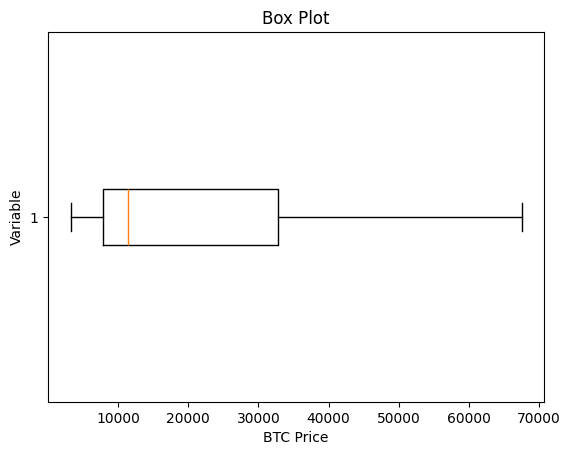

In [13]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Close'], vert=False)
plt.ylabel('Variable')
plt.xlabel('BTC Price')
plt.title('Box Plot')
plt.show()

In [14]:
Q1 = df1['Close'].quantile(0.25)
Q3 = df1['Close'].quantile(0.75)
IQR = Q3 - Q1

print('Interquartile range: ', IQR)

#The lower bound is negative, hence we use 0 
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print('Lower bound: ', lower_bound) 
print('Upper bound ', upper_bound)

Interquartile range:  24885.699999999997
Lower bound:  0
Upper bound  70056.65


In [15]:
max_value = df1['Close'].max()
print('Max value: ', max_value)

Max value:  67527.9


In [67]:
df2.head()

,Date,BTC_Closing,Sentiment
454,2022-01-01,47686.812500,1
453,2022-01-02,47345.218750,2
452,2022-01-03,46458.117188,2
451,2022-01-04,45897.574219,1
450,2022-01-05,43569.003906,1


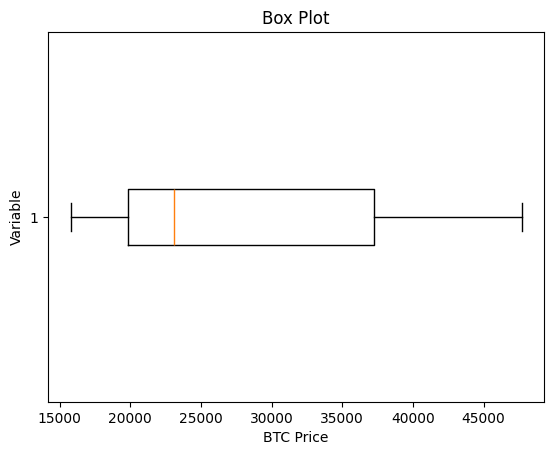

In [68]:
import matplotlib.pyplot as plt

plt.boxplot(df2['BTC_Closing'], vert=False)
plt.ylabel('Variable')
plt.xlabel('BTC Price')
plt.title('Box Plot')
plt.show()

In [19]:
Q1 = df1['Close'].quantile(0.25)
Q3 = df1['Close'].quantile(0.75)
IQR = Q3 - Q1

print('Interquartile range: ', IQR)

#The lower bound is negative, hence we use 0 
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print('Lower bound: ', lower_bound) 
print('Upper bound ', upper_bound)

Interquartile range:  24885.699999999997
Lower bound:  0
Upper bound  70056.65


In [26]:
#Memotong data untuk tahun 2023
df_2023 = df[df['Date'].dt.year == 2023]
print(df_2023.head())

         Date    Close     Open     High      Low  Change  \
89 2023-01-01  16618.4  16537.5  16621.9  16499.7  0.0049   
88 2023-01-02  16674.3  16618.4  16766.9  16551.0  0.0034   
87 2023-01-03  16674.2  16673.1  16773.2  16607.2 -0.0000   
86 2023-01-04  16852.1  16674.2  16976.5  16656.5  0.0107   
85 2023-01-05  16829.8  16852.2  16877.9  16772.3 -0.0013   

   Change Classification  Value Value_Classification   BTC_Closing  \
89                Stable   26.0                 Fear  16625.080078   
88                Stable   27.0                 Fear  16688.470703   
87                Stable   26.0                 Fear  16679.857422   
86                    Up   29.0                 Fear  16863.238281   
85                Stable   29.0                 Fear  16836.736328   

     BTC_Volume  
89   9244361700  
88  12097775227  
87  13903079207  
86  18421743322  
85  13692758566  


In [28]:
#Buat file CSV untuk data 2023
df_2023.to_csv('data/BTC_2023.csv', index=False)
